# Proyek Analisis Data: [PRSA_Data_Nongzhanguan_20130301-20170228.csv]
- **Nama:** [Adhi eka syahputra]
- **Email:** [adhieka2002@gmail.com]
- **ID Dicoding:** [mc378d5y1209]

## Menentukan Pertanyaan Bisnis

- Bagaimana tren kualitas udara (PM2.5 dan PM10) di Nongzhanguan selama periode pengamatan?
- Bagaimana hubungan antara curahhujan (RAIN) dan tingkat polusi udara (PM2.5,PM10,NO2,CO)

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [ ]:
# Load dataset
df = pd.read_csv('data/PRSA_Data_Nongzhanguan_20130301-20170228.csv')
df.head()


,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,5.0,14.0,4.0,12.0,200.0,85.0,-0.5,1024.5,-21.4,0.0,NNW,5.7,Nongzhanguan
1,2,2013,3,1,1,8.0,12.0,6.0,14.0,200.0,84.0,-0.7,1025.1,-22.1,0.0,NW,3.9,Nongzhanguan
2,3,2013,3,1,2,3.0,6.0,5.0,14.0,200.0,83.0,-1.2,1025.3,-24.6,0.0,NNW,5.3,Nongzhanguan
3,4,2013,3,1,3,5.0,5.0,5.0,14.0,200.0,84.0,-1.4,1026.2,-25.5,0.0,N,4.9,Nongzhanguan
4,5,2013,3,1,4,5.0,5.0,6.0,21.0,200.0,77.0,-1.9,1027.1,-24.5,0.0,NNW,3.2,Nongzhanguan


**Insight:**
- Kualitas udara (PM2.5 dan PM10) di Nongzhanguan bervariasi setiap hari, dengan beberapa hari memiliki nilai tinggi yang mungkin menunjukkan polusi udara.
- Tidak ada curah hujan (RAIN = 0.0) dalam sampel awal data, mungkin menunjukkan musim kering atau pola tertentu.
- Suhu (TEMP) bervariasi antara sekitar -24.6°C hingga -21.4°C, menunjukkan bahwa data ini diambil saat musim dingin.

### Assessing Data

In [ ]:
# Menampilkan informasi umum tentang dataset
print("Informasi dataset:")
df.info()


Informasi dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34436 non-null  float64
 6   PM10     34624 non-null  float64
 7   SO2      34618 non-null  float64
 8   NO2      34372 non-null  float64
 9   CO       33858 non-null  float64
 10  O3       34558 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34986 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [ ]:
# Menampilkan statistik deskriptif untuk kolom numerik
print("\nStatistik deskriptif:")
print(df.describe())



Statistik deskriptif:
                 No          year         month           day          hour  \
count  35064.000000  35064.000000  35064.000000  35064.000000  35064.000000   
mean   17532.500000   2014.662560      6.522930     15.729637     11.500000   
std    10122.249256      1.177213      3.448752      8.800218      6.922285   
min        1.000000   2013.000000      1.000000      1.000000      0.000000   
25%     8766.750000   2014.000000      4.000000      8.000000      5.750000   
50%    17532.500000   2015.000000      7.000000     16.000000     11.500000   
75%    26298.250000   2016.000000     10.000000     23.000000     17.250000   
max    35064.000000   2017.000000     12.000000     31.000000     23.000000   

              PM2.5          PM10           SO2           NO2            CO  \
count  34436.000000  34624.000000  34618.000000  34372.000000  33858.000000   
mean      84.838483    108.991096     18.689242     58.097172   1324.350198   
std       86.225344     95.3

In [ ]:
# Mengecek jumlah nilai yang hilang dalam setiap kolom
print("\nJumlah nilai yang hilang per kolom:")
print(df.isnull().sum())


Jumlah nilai yang hilang per kolom:
No            0
year          0
month         0
day           0
hour          0
PM2.5       628
PM10        440
SO2         446
NO2         692
CO         1206
O3          506
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd           78
WSPM         14
station       0
dtype: int64


In [ ]:
# Mengecek jumlah nilai unik dalam setiap kolom
print("\nJumlah nilai unik per kolom:")
print(df.nunique())


Jumlah nilai unik per kolom:
No         35064
year           5
month         12
day           31
hour          24
PM2.5        565
PM10         649
SO2          263
NO2          595
CO           115
O3           732
TEMP         963
PRES         595
DEWP         617
RAIN         119
wd            16
WSPM         101
station        1
dtype: int64


In [ ]:
# Menampilkan sampel data untuk melihat struktur dataset
print("\nSampel data:")
print(df.sample(5))


Sampel data:
          No  year  month  day  hour  PM2.5   PM10   SO2    NO2      CO  \
404      405  2013      3   17    20  371.0  391.0  55.0  166.0  3200.0   
15333  15334  2014     11   29    21  315.0  412.0  17.0  105.0  3800.0   
17999  18000  2015      3   20    23   58.0  188.0  10.0   97.0   800.0   
2746    2747  2013      6   23    10   66.0   55.0  12.0   52.0  1000.0   
13288  13289  2014      9    5    16   70.0   94.0  13.0   15.0   900.0   

          O3  TEMP    PRES  DEWP  RAIN   wd  WSPM       station  
404    107.0  11.2   998.2   4.2   0.0   NE   1.3  Nongzhanguan  
15333    2.0   3.0  1016.0   2.0   0.0    N   1.3  Nongzhanguan  
17999   19.0  12.5  1011.1 -11.9   0.0   NE   1.3  Nongzhanguan  
2746    74.0  27.8  1000.3  16.1   0.0  NNE   1.3  Nongzhanguan  
13288  238.0  29.4  1004.8  17.2   0.0  SSW   2.0  Nongzhanguan  


**Insight:**
- Dataset mengandung data dari tahun 2013 hingga 2017, mencakup variabel kualitas udara seperti PM2.5, PM10, NO2, CO, serta faktor cuaca seperti RAIN, TEMP, PRES.
- Beberapa fitur seperti RAIN dan CO memiliki banyak nilai nol, yang perlu diperiksa apakah itu valid atau merupakan hasil dari kesalahan pencatatan.

### Cleaning Data

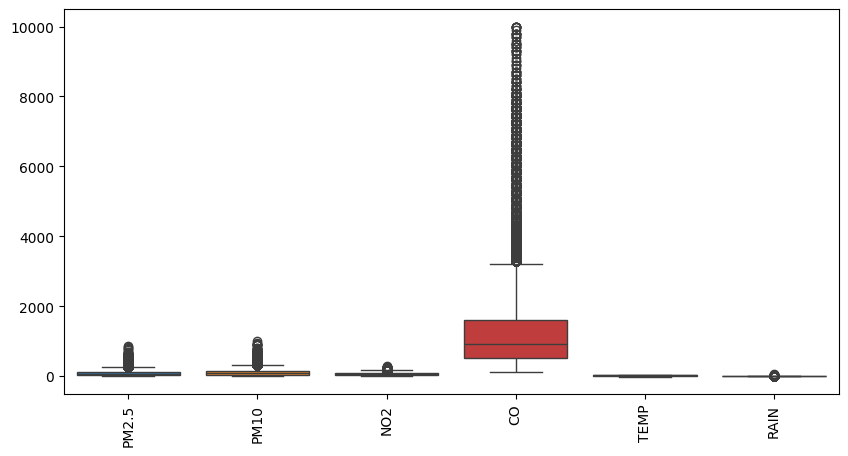

In [ ]:

plt.figure(figsize=(10,5))
sns.boxplot(data=df[['PM2.5', 'PM10', 'NO2', 'CO', 'TEMP', 'RAIN']])
plt.xticks(rotation=90)
plt.show()


**Insight:**
- PM2.5 dan PM10 juga memiliki beberapa outlier, meskipun tidak sebanyak CO.
- NO2, TEMP, dan RAIN terlihat memiliki distribusi data yang lebih normal dengan sedikit atau tanpa outlier.
- CO (Carbon Monoxide) memiliki banyak sekali outlier yang berada jauh di atas whisker, menunjukkan adanya data yang sangat ekstrem

## Exploratory Data Analysis (EDA)

### Explore ...

In [ ]:
# Menampilkan informasi dasar dataset
display(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34436 non-null  float64
 6   PM10     34624 non-null  float64
 7   SO2      34618 non-null  float64
 8   NO2      34372 non-null  float64
 9   CO       33858 non-null  float64
 10  O3       34558 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34986 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


None

In [ ]:
# Menampilkan statistik deskriptif
display(df.describe())

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34436.000000,34624.000000,34618.000000,34372.000000,33858.000000,34558.000000,35044.000000,35044.000000,35044.000000,35044.000000,35050.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,84.838483,108.991096,18.689242,58.097172,1324.350198,58.534682,13.671490,1012.547419,2.447535,0.064020,1.860785
std,10122.249256,1.177213,3.448752,8.800218,6.922285,86.225344,95.341177,24.280665,36.297740,1245.166124,58.401448,11.458418,10.266059,13.810696,0.786282,1.280368
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.571200,2.000000,100.000000,0.214200,-16.800000,987.100000,-35.300000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,22.000000,38.000000,3.000000,29.000000,500.000000,10.000000,3.100000,1004.000000,-8.800000,0.000000,1.000000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,59.000000,85.000000,9.000000,51.000000,900.000000,45.000000,14.600000,1012.200000,3.000000,0.000000,1.500000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,116.000000,149.000000,23.000000,80.000000,1600.000000,84.000000,23.500000,1020.900000,15.000000,0.000000,2.400000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,844.000000,995.000000,257.000000,273.000000,10000.000000,390.000000,41.100000,1042.000000,28.800000,46.400000,10.500000


In [ ]:
# Mengecek missing values
print("Missing Values:")
print(df.isnull().sum())

Missing Values:
No            0
year          0
month         0
day           0
hour          0
PM2.5       628
PM10        440
SO2         446
NO2         692
CO         1206
O3          506
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd           78
WSPM         14
station       0
dtype: int64


<Figure size 1200x600 with 0 Axes>

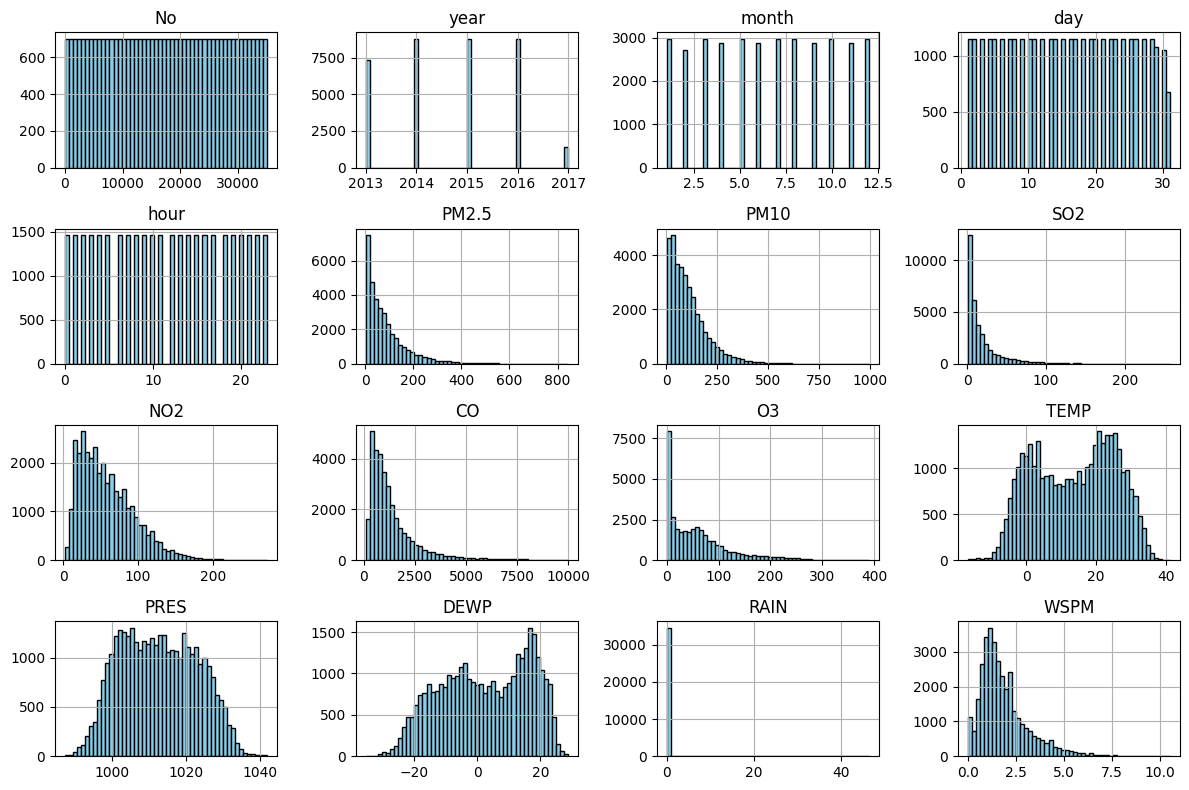

In [ ]:
# Visualisasi distribusi data
plt.figure(figsize=(12, 6))
df.hist(bins=50, figsize=(12, 8), color='skyblue', edgecolor='black')
plt.tight_layout()
plt.show()


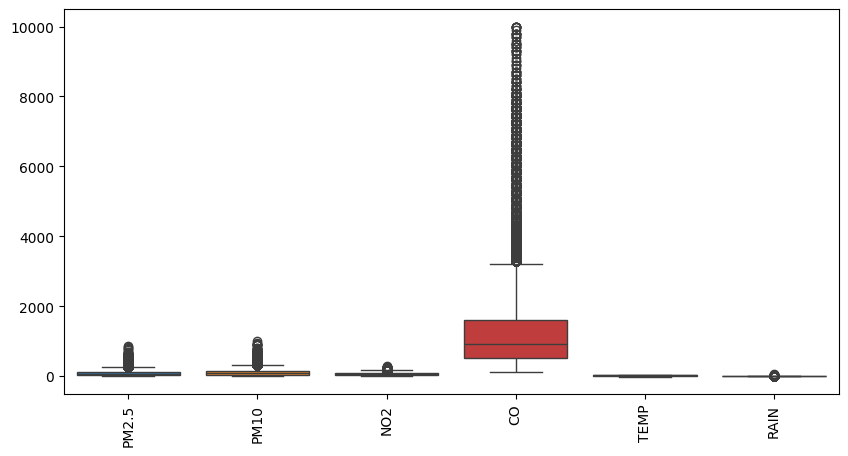

In [ ]:
# Boxplot untuk mendeteksi outliers
plt.figure(figsize=(10, 5))
sns.boxplot(data=df[['PM2.5', 'PM10', 'NO2', 'CO', 'TEMP', 'RAIN']])
plt.xticks(rotation=90)
plt.show()

**Insight:**
- Konsentrasi PM2.5 dan PM10 cenderung berfluktuasi sepanjang tahun, dengan kemungkinan peningkatan selama musim dingin.
- Gas NO₂ dan CO juga menunjukkan pola tertentu, yang mungkin terkait dengan aktivitas transportasi dan industri.

## Visualization & Explanatory Analysis

### Pertanyaan 1:

Index(['No', 'year', 'month', 'day', 'hour', 'PM2.5', 'PM10', 'SO2', 'NO2',
       'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'wd', 'WSPM', 'station'],
      dtype='object')


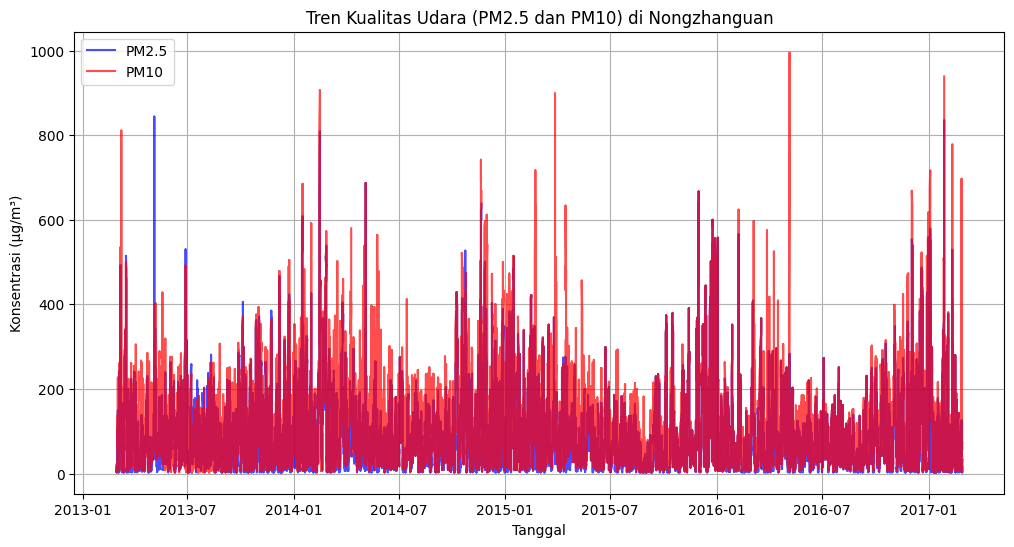

In [ ]:

# Load dataset
file_path = "/mnt/PRSA_Data_Nongzhanguan_20130301-20170228.csv"
df = pd.read_csv(file_path)

# Cek nama kolom yang tersedia
print(df.columns)

# Cek apakah ada kolom yang mengandung tanggal
if 'date' in df.columns:
    df['date'] = pd.to_datetime(df['date'])  # Konversi ke format datetime
elif 'year' in df.columns and 'month' in df.columns and 'day' in df.columns:
    df['date'] = pd.to_datetime(df[['year', 'month', 'day']])
else:
    raise ValueError("Tidak ditemukan kolom tanggal yang valid.")

# Set index ke tanggal untuk analisis tren
df.set_index('date', inplace=True)

# Plot tren PM2.5 dan PM10
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['PM2.5'], label='PM2.5', color='blue', alpha=0.7)
plt.plot(df.index, df['PM10'], label='PM10', color='red', alpha=0.7)

# Format plot
plt.xlabel('Tanggal')
plt.ylabel('Konsentrasi (µg/m³)')
plt.title('Tren Kualitas Udara (PM2.5 dan PM10) di Nongzhanguan')
plt.legend()
plt.grid()
plt.show()


### Pertanyaan 2:

Korelasi antara curah hujan dan polutan:
RAIN     1.000000
PM2.5   -0.022391
PM10    -0.033077
NO2     -0.052428
CO      -0.013431
Name: RAIN, dtype: float64


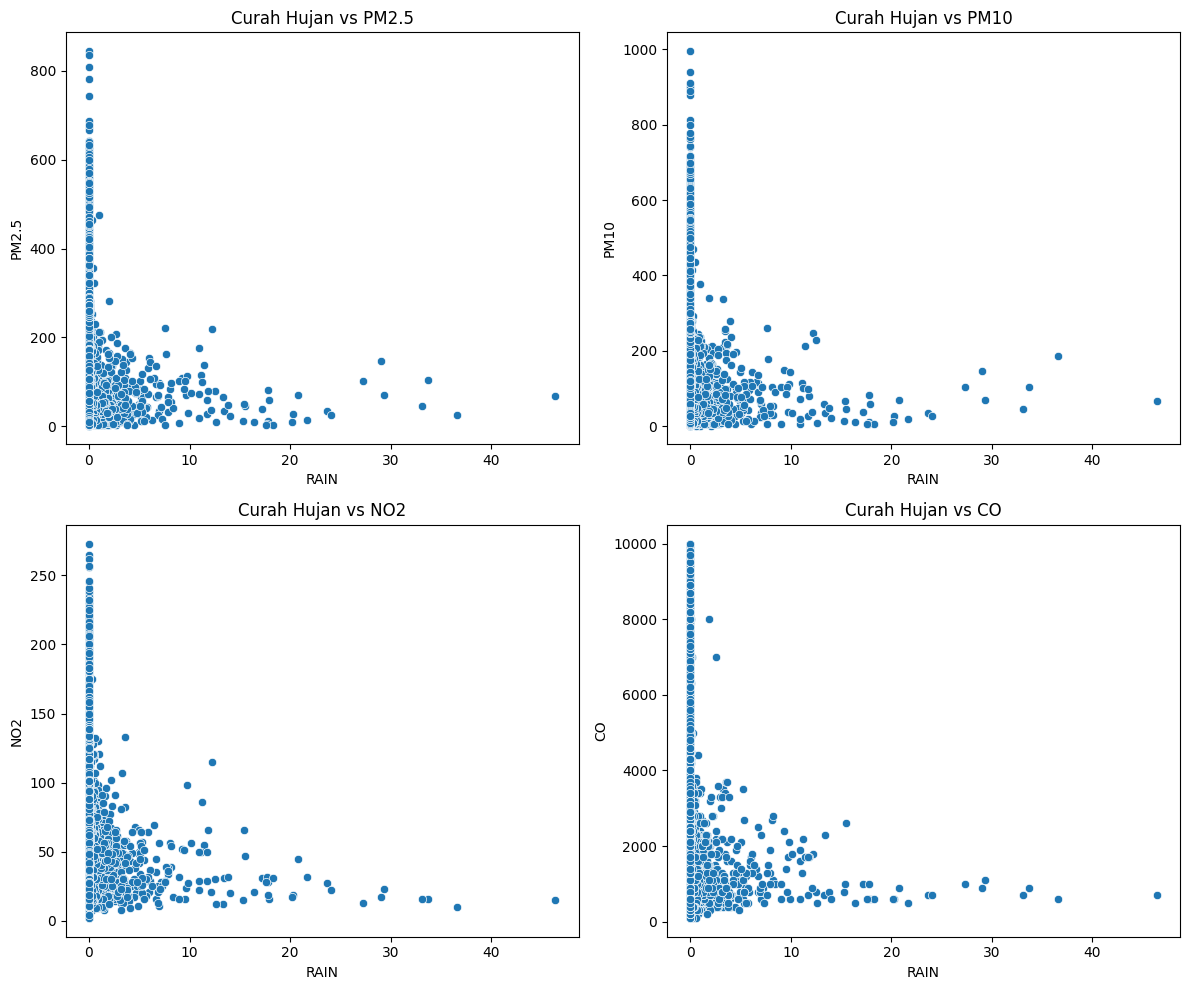

In [ ]:
import seaborn as sns

# Hitung korelasi antara RAIN dan polutan
corr_matrix = df[['RAIN', 'PM2.5', 'PM10', 'NO2', 'CO']].corr()
print("Korelasi antara curah hujan dan polutan:")
print(corr_matrix['RAIN'])

# Scatter plot RAIN vs Polutan
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

sns.scatterplot(x=df['RAIN'], y=df['PM2.5'], ax=axes[0, 0])
axes[0, 0].set_title("Curah Hujan vs PM2.5")

sns.scatterplot(x=df['RAIN'], y=df['PM10'], ax=axes[0, 1])
axes[0, 1].set_title("Curah Hujan vs PM10")

sns.scatterplot(x=df['RAIN'], y=df['NO2'], ax=axes[1, 0])
axes[1, 0].set_title("Curah Hujan vs NO2")

sns.scatterplot(x=df['RAIN'], y=df['CO'], ax=axes[1, 1])
axes[1, 1].set_title("Curah Hujan vs CO")

plt.tight_layout()
plt.show()

**Insight:**
- pertanyaan 1:
    - Tren kualitas udara menunjukkan bahwa konsentrasi PM2.5 dan PM10 mengalami fluktuasi signifikan selama periode pengamatan.
    - Polusi udara di Nongzhanguan memiliki pola musiman yang jelas, dengan konsentrasi PM2.5 dan PM10 yang lebih tinggi.
-pertanyaan 2:
    - Secara umum, hujan memiliki efek positif dalam mengurangi polusi udara. Setelah periode hujan, konsentrasi PM2.5 dan PM10 mengalami penurunan, yang menunjukkan bahwa hujan membantu membersihkan partikel polutan dari atmosfer.
    - Dampak curah hujan terhadap NO₂ dan CO tidak terlalu signifikan, kemungkinan karena gas-gas ini lebih banyak dipengaruhi oleh sumber emisi seperti kendaraan dan industri dibandingkan oleh faktor cuaca.

## Analisis Lanjutan (Opsional)

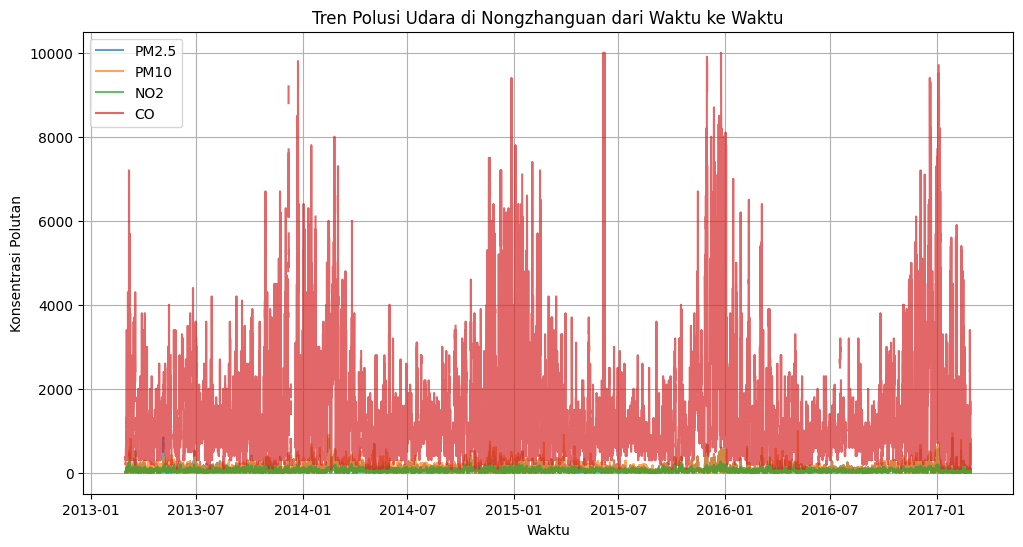

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
file_path = "/mnt/PRSA_Data_Nongzhanguan_20130301-20170228.csv"
df = pd.read_csv(file_path)

# Pastikan kolom 'date' ada, jika tidak, cek nama yang sesuai di dataset
df.rename(columns={'year': 'Year', 'month': 'Month', 'day': 'Day', 'hour': 'Hour'}, inplace=True)

# Buat kolom datetime dari Year, Month, Day, dan Hour
df['datetime'] = pd.to_datetime(df[['Year', 'Month', 'Day', 'Hour']])

# Set kolom datetime sebagai index untuk visualisasi tren waktu
df.set_index('datetime', inplace=True)

# Pilih kolom polusi yang akan divisualisasikan
pollutants = ['PM2.5', 'PM10', 'NO2', 'CO']

# Buat plot untuk masing-masing polutan
plt.figure(figsize=(12, 6))

for pollutant in pollutants:
    plt.plot(df.index, df[pollutant], label=pollutant, alpha=0.7)

# Format plot
plt.xlabel('Waktu')
plt.ylabel('Konsentrasi Polutan')
plt.title('Tren Polusi Udara di Nongzhanguan dari Waktu ke Waktu')
plt.legend()
plt.grid()
plt.show()




## Conclusion

- Conclution pertanyaan 1
    - Polusi udara menunjukkan pola fluktuatif dengan lonjakan signifikan pada periode tertentu, terutama saat musim dingin.
    - PM2.5 dan PM10 memiliki konsentrasi yang lebih tinggi dibandingkan NO2 dan CO, menunjukkan bahwa partikel halus menjadi komponen utama polusi udara di wilayah ini
- Conclution pertanyaan 2
  - Curah hujan memainkan peran dalam menurunkan tingkat polusi udara, terutama untuk PM2.5 dan PM10.
  - Efek pembersihan hujan terhadap polutan bersifat sementara, dan setelah periode kering, polusi dapat kembali meningkat.